# The Multi PV Panel T4’s Domain - Sapir Tubul & Roey Ogen

* This episodic setting involves multiple T4's that can move around a Solar Panel field.
* Each T4 robot can independently travel to neighboring trackers over dedicated bridges.
* Each T4 accumulates a cost for each section cleaned. 
* Each T4 holds a certain amount of charge. 
* The challenge is to collaboratively clean the panels using the T4's.




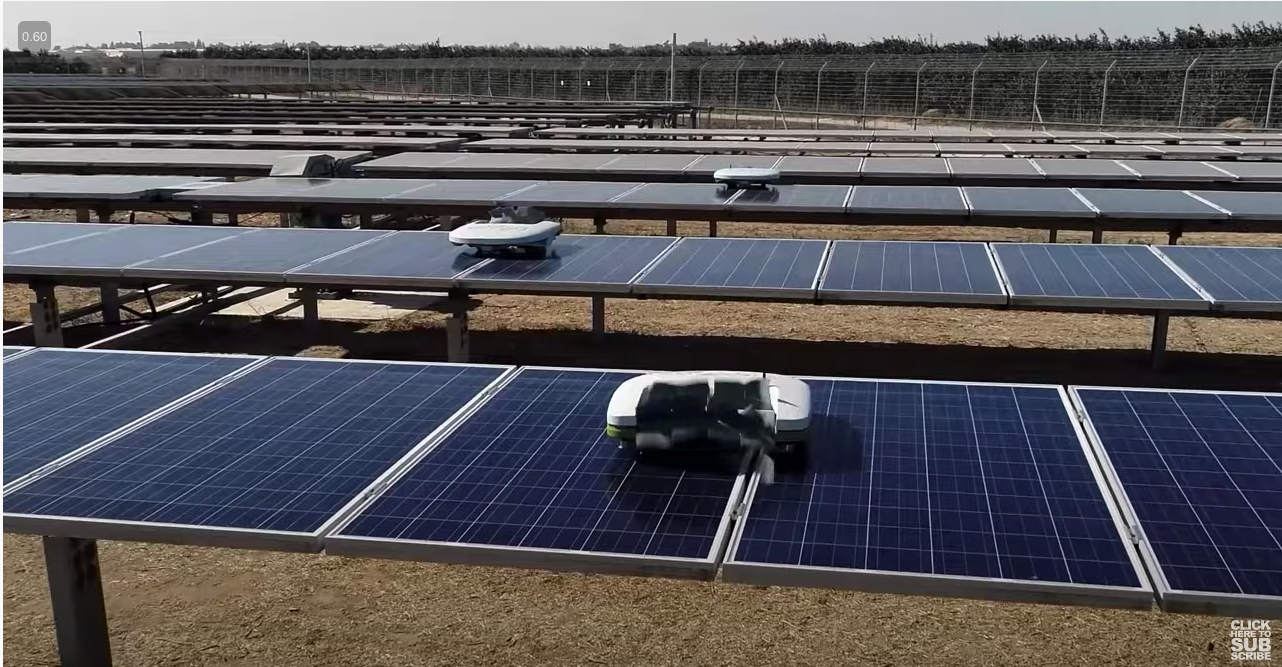

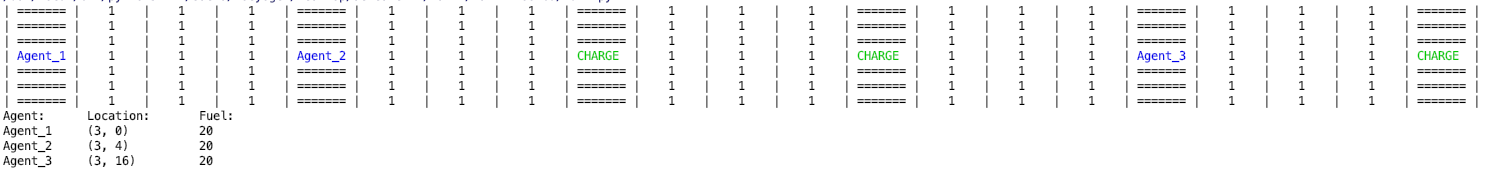

## Imports:

In [ ]:
import random
import time
import pickle
from IPython.display import clear_output

In [ ]:
import os
import shutil
from subprocess import getoutput

getoutput("git clone -l -s https://github.com/roeyogen/FSTMA-roomba cloned-repo")
os.chdir('cloned-repo')
getoutput("git fetch --all")
getoutput("git reset --hard origin/master")
from environment import *
from meta_environment import *
from meta_solver import *
from meta_joint_solver import *
from multi_agent_single_panel import *
from offline_graph_path import *

In [ ]:
# if online in colab then:

"""
add the following "pickels" file from: https://drive.google.com/drive/folders/1qvGcVfwOcxBDKMHu-558d0V7VliFFVnU?usp=sharing
to your drive under "/content/drive/My Drive/Colab Notebooks/pickles"
"""
# uncomment these lines 


from google.colab import drive
drive.mount('/content/drive')

! ls "/content/drive/My Drive/Colab Notebooks/pickles"

"""
make sure the following files appear:

joint_agent_per_panel_cost_action    one_agent_per_panel_meta_solution
joint_agent_per_panel_meta_solution  presentation
one_agent_per_panel_cost_action

"""

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
joint_agent_per_panel_cost_action    one_agent_per_panel_meta_solution
joint_agent_per_panel_meta_solution  presentation
one_agent_per_panel_cost_action


'\nmake sure the following files appear:\n\njoint_agent_per_panel_cost_action    one_agent_per_panel_meta_solution\njoint_agent_per_panel_meta_solution  presentation\none_agent_per_panel_cost_action\n\n'

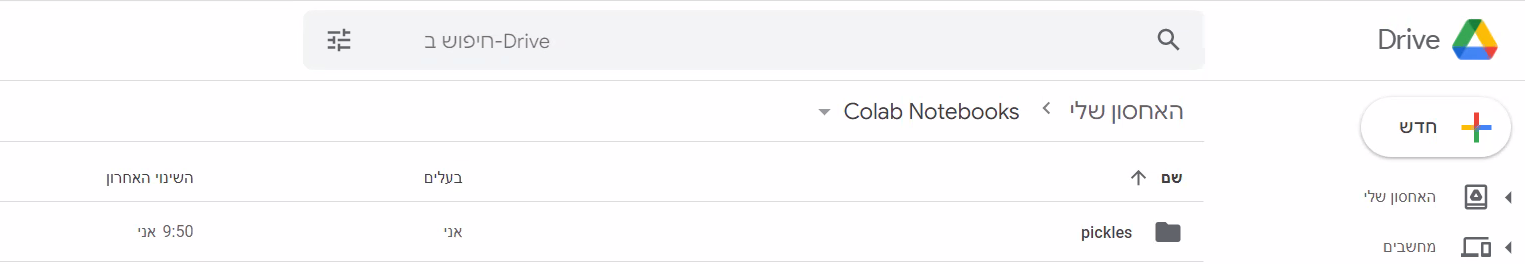

In [ ]:
#if offline then uncomment:
#is_notebook=False

#if online then uncomment:
is_notebook=True

## Number of states:
$$
|S| =  (\text{max_dirty_panel} + 1)^{\text{height} \cdot \text{width} \cdot \text{panels}}  \cdot {\text{height} \cdot \text{width} \cdot \text{panels} + \text{panels} + 1 \choose \text{agents}} \cdot \text{agent}! \cdot \Pi_{agent\in agents}{(\text{agent.max_fuel} + 1)}
$$
## Number of actions:
$$
|A| = |{'STAY', 'UP', 'DOWN', 'RIGHT', 'LEFT'}|^{|agents|}=5^{|agents|}
$$

For example:
* 1 agent, 1 panel, board size = 3x3, max_dirty_panel = 1, max_fuel = 20:
$$
|S| =  (1 + 1)^{3 \cdot 3 \cdot 1}  \cdot {3 \cdot 3 \cdot 1 + 1 + 1 \choose 1} \cdot 21 = 2^9 \cdot 11 \cdot 21 = 118,272
$$
$$
|A| = 5
$$

This is a function that implements the state num equation above:

In [ ]:
from scipy.special import comb

def number_of_state(height, width, panels, max_dirty_panel, max_fuel, agents):
  assert agents==len(max_fuel)
  fuel = 1
  for f in max_fuel.values():
    fuel = fuel * (f + 1)
  return int((max_dirty_panel + 1) ** (height * width * panels) * (comb(height * width * panels + panels + 1, agents)) * fuel)

In [ ]:
env = Env(num_of_solar_panels=1, height=3, width=3, number_of_agents=1, max_fuel={"Agent_1": 20}, fixed_starting = None)
env.render()

| ======= |    1    |    1    |    1    | ======= |
| CHARGE  |    1    |    1    |    1    | Agent_1 |
| ======= |    1    |    1    |    1    | ======= |
Agent: 		Location: 		Fuel:
Agent_1		(1, 4)			20


The state size for the problem above is:

In [ ]:
number_of_state(height=3, width=3, panels=1, max_dirty_panel=1, max_fuel={"Agent_1": 20}, agents=1)

118272

# Solving the problem

Complex tasks like cleaning solar panels require decision making at
all levels, from planning, navigating, following the agents in the
board to properly executing the fine motor skills needed at each step
along the way based on high-dimensional sensory inputs. Hierarchical
reinforcement learning (HRL) promises to automatically break down
such complex tasks into manageable subgoals, enabling artificial
agents to solve tasks more autonomously from fewer rewards, also
known as sparse rewards. However, research progress on HRL has
proven to be challenging; current methods rely on manually specified
goal spaces or subtasks, and no general solution exists.



# Part 1 - Single Agent, Single Panel

* We began our approach by formulating our agent - a single cleaning robot.
    
* Each Agent starts with a certain amount of fuel and can preform the following actions at each time-step: $\{STAY, UP, DOWN, RIGHT, LEFT \}$.

     <a href="javascript:document.getElementsByTagName('body')[0].innerHTML='<img src=images/image.jpg width=800 height=600>'"><img src="https://www.greenprophet.com/wp-content/uploads/solar-panel-roomba-ecoppia-gets.jpg"  width="300" height="214" border="0" ></a>




* We began the cleaning solution by cleaning a single panel using a single agent.
* Each state containing a board, an agent and fuel was formulated into a node object.
* Formulating each state of the cleaning problem as a node enabled us to use A* to solve a graph search problem.
* Each board has essentially 4 problems to be solved on it based on the agents' starting location and finishing location giving us: $\{Right Right, Right Left, Left Left, Left Right\}$.





##1.	3\*3, Left to Right, Fuel = 20, A*  
 

In [ ]:
# @@@@@@@@@@ 1. 3*3, Left to Right, Fuel = 20, Astar
print("\n@@@@@@@@@@ 2. 3x3, Left to Right, Fuel = 20, Astar")

solution_file_path = "pickles/presentation/Single Agent Single Panel/3x3, Left to Right, Fuel = 20, Astar.pkl"
if is_notebook:
    solution_file_path = solution_file_path.replace("pickles","/content/drive/My Drive/Colab Notebooks/pickles")
solution_file = open(solution_file_path, "rb")

solution = pickle.load(solution_file)

for state in solution.path:
    time.sleep(0.5)
    clear_output(wait=True)
    print(state)
    

print("-" * 10)
print("Solution Cost =", solution.cost)
print("Number of Nodes Expanded =", solution.n_node_expanded)
print("Run Time =", int(solution.solve_time), "sec")

| ======= |         |         |         | ======= |
| CHARGE  |         |         |         |  Agent  |
| ======= |         |         |         | ======= |
Agent Fuel = 20

----------
Solution Cost = 12
Number of Nodes Expanded = 4344
Run Time = 1 sec


##2.	3\*3, Left to Left, Fuel = 20, A*  


In [ ]:
# @@@@@@@@@@ 2. 3*3, Left to Left, Fuel = 20, Astar
print("\n@@@@@@@@@@ 3. 3x3, Left to Left, Fuel = 20, Astar")

solution_file_path = "pickles/presentation/Single Agent Single Panel/3x3, Left to Left, Fuel = 20, Astar.pkl"
if is_notebook:
    solution_file_path = solution_file_path.replace("pickles","/content/drive/My Drive/Colab Notebooks/pickles")
solution_file = open(solution_file_path, "rb")
solution = pickle.load(solution_file)

for state in solution.path:
    time.sleep(0.5)
    clear_output(wait=True)
    print(state)

print("-" * 10)
print("Solution Cost =", solution.cost)
print("Number of Nodes Expanded =", solution.n_node_expanded)
print("Run Time =", int(solution.solve_time), "sec")

| ======= |         |         |         | ======= |
|  Agent  |         |         |         | CHARGE  |
| ======= |         |         |         | ======= |
Agent Fuel = 20

----------
Solution Cost = 12
Number of Nodes Expanded = 3713
Run Time = 0 sec


##3.	3\*3, Left to Left, Fuel = 6, A*  


In [ ]:
# @@@@@@@@@@ 3. 3*3, Left to Left, Fuel = 6, Astar
print("\n@@@@@@@@@@ 4. 3x3, Left to Left, Fuel = 6, Astar")


solution_file_path = "pickles/presentation/Single Agent Single Panel/3x3, Left to Left, Fuel = 6, Astar.pkl"
if is_notebook:
    solution_file_path = solution_file_path.replace("pickles","/content/drive/My Drive/Colab Notebooks/pickles")

solution_file = open(solution_file_path, "rb")
solution = pickle.load(solution_file)

for state in solution.path:
    time.sleep(0.5)
    clear_output(wait=True)
    print(state)

print("-" * 10)
print("Solution Cost =", solution.cost)
print("Number of Nodes Expanded =", solution.n_node_expanded)
print("Run Time =", int(solution.solve_time), "sec")

| ======= |         |         |         | ======= |
|  Agent  |         |         |         | CHARGE  |
| ======= |         |         |         | ======= |
Agent Fuel = 6

----------
Solution Cost = 16
Number of Nodes Expanded = 67306
Run Time = 3 sec


##4.	3\*3, Left to Left, Fuel = 10, A*  


In [ ]:
# @@@@@@@@@@ 4. 3*3, Left to Left, Fuel = 10, Astar
print("\n@@@@@@@@@@ 5. 3x3, Left to Left, Fuel = 10, Astar")


solution_file_path = "pickles/presentation/Single Agent Single Panel/3x3, Left to Left, Fuel = 10, Astar.pkl"
if is_notebook:
    solution_file_path = solution_file_path.replace("pickles","/content/drive/My Drive/Colab Notebooks/pickles")

solution_file = open(solution_file_path, "rb")
solution = pickle.load(solution_file)

for state in solution.path:
    time.sleep(0.5)
    clear_output(wait=True)
    print(state)

print("-" * 10)
print("Solution Cost =", solution.cost)
print("Number of Nodes Expanded =", solution.n_node_expanded)
print("Run Time =", int(solution.solve_time), "sec")

| ======= |         |         |         | ======= |
|  Agent  |         |         |         | CHARGE  |
| ======= |         |         |         | ======= |
Agent Fuel = 10

----------
Solution Cost = 14
Number of Nodes Expanded = 96997
Run Time = 5 sec


##5.	5\*10, Left to Right, Fuel = 60, A* 

In [ ]:
# @@@@@@@@@@ 5. 5*10, Left to Right, Fuel = 60, Astar
print("\n@@@@@@@@@@ 6. 5x10, Left to Right, Fuel = 60, Astar")

solution_file_path = "pickles/presentation/Single Agent Single Panel/5x10, Left to Right, Fuel = 60, Astar.pkl"
if is_notebook:
    solution_file_path = solution_file_path.replace("pickles","/content/drive/My Drive/Colab Notebooks/pickles")

solution_file = open(solution_file_path, "rb")
solution = pickle.load(solution_file)

for state in solution.path:
    time.sleep(0.5)
    clear_output(wait=True)
    print(state)

print("-" * 10)
print("Solution Cost =", solution.cost)
print("Number of Nodes Expanded =", solution.n_node_expanded)
print("Run Time =", int(solution.solve_time), "sec")

| ======= |         |         |         |         |         |         |         |         |         |         | ======= |
| ======= |         |         |         |         |         |         |         |         |         |         | ======= |
| CHARGE  |         |         |         |         |         |         |         |         |         |         |  Agent  |
| ======= |         |         |         |         |         |         |         |         |         |         | ======= |
| ======= |         |         |         |         |         |         |         |         |         |         | ======= |
Agent Fuel = 60

----------
Solution Cost = 51
Number of Nodes Expanded = 214758
Run Time = 23 sec


##6. Extra Dirty

In [ ]:
# @@@@@@@@@@ 6. Extra Dirty
print("\n@@@@@@@@@@ 7. Extra Dirty")

solution_file_path = "pickles/presentation/Single Agent Single Panel/4x4, Left to Right, Fuel = 60, Astar with Extra Dirty.pkl"
if is_notebook:
    solution_file_path = solution_file_path.replace("pickles","/content/drive/My Drive/Colab Notebooks/pickles")

solution_file = open(solution_file_path, "rb")
solution = pickle.load(solution_file)

for state in solution.path:
    time.sleep(0.5)
    clear_output(wait=True)
    print(state)

print("-" * 10)
print("Solution Cost =", solution.cost)
print("Number of Nodes Expanded =", solution.n_node_expanded)
print("Run Time =", int(solution.solve_time), "sec")

| ======= |         |         |         |         | ======= |
| ======= |         |         |         |         | ======= |
| CHARGE  |         |         |         |         |  Agent  |
| ======= |         |         |         |         | ======= |
Agent Fuel = 60

----------
Solution Cost = 59
Number of Nodes Expanded = 101039
Run Time = 12 sec


#Part 2 - Multi Agent

##  1.	First, a simple problem of a single row
* Moving forward with our approach we formulated our controller agent - The Meta Agent. 
* The Meta Agent's actions are: $\{STAY, RIGHT-RIGHT, RIGHT-LEFT, LEFT-LEFT, LEFT-RIGHT \}^{numberOfAgents}$.
* Each action preforms the cleaning of the board, with the name representing the agents' starting location and finishing location.
* We create a Cost function mapping each action to a cost calculated in the step above.
* The Meta Agent assigns a panel to clean for each agent using the cost function to select the joint action with the lowest cost.
* This too is done by using A* search on the meta graph.

In [ ]:
# @@@@@@@@@@ 1. First, a simple problem of a single row

print("\n@@@@@@@@@@ 1. First, a simple problem of a single row")

costs = {'Agent_1': {'STAY': 1, 'RIGHT_RIGHT': 5, 'RIGHT_LEFT': 6, 'LEFT_LEFT': 5, 'LEFT_RIGHT': 6},
          'Agent_2': {'STAY': 1, 'RIGHT_RIGHT': 5, 'RIGHT_LEFT': 6, 'LEFT_LEFT': 5, 'LEFT_RIGHT': 6}}

max_agent_fuel = {"Agent_1": 20, "Agent_2": 20}

graph = MetaGraph(num_of_solar_panels=4, height=1, width=1, number_of_agents=2, max_agent_fuel=max_agent_fuel,
                  costs=costs, fixed_starting=(0, 3))


solution_file_path = "pickles/presentation/Multi Agent Single Panel/a simple problem of a single row.pkl"
if is_notebook:
    solution_file_path = solution_file_path.replace("pickles","/content/drive/My Drive/Colab Notebooks/pickles")

solution_file = open(solution_file_path, "rb")
solution = pickle.load(solution_file)

for state in solution.path:
    print(state)
    time.sleep(0.5)

print("-" * 10)
print("Solution Cost =", solution.cost)
print("Number of Nodes Expanded =", solution.n_node_expanded)
print("Run Time =", int(solution.solve_time), "sec")


@@@@@@@@@@ 1. First, a simple problem of a single row
| Agent_1 |    1    | CHARGE  |    1    | CHARGE  |    1    | Agent_2 |    1    | CHARGE  |
Agent: 		Location: 	Fuel: 	Cost:
Agent_1		 [0, 0]		 20		 0
Agent_2		 [0, 6]		 20		 0

| CHARGE  |         | Agent_1 |    1    | CHARGE  |         | Agent_2 |    1    | CHARGE  |
Agent: 		Location: 	Fuel: 	Cost:
Agent_1		 [0, 2]		 20		 5
Agent_2		 [0, 6]		 20		 6

| CHARGE  |         | CHARGE  |         | Agent_1 |         | CHARGE  |         | Agent_2 |
Agent: 		Location: 	Fuel: 	Cost:
Agent_1		 [0, 4]		 20		 10
Agent_2		 [0, 8]		 20		 11

----------
Solution Cost = 11
Number of Nodes Expanded = 323
Run Time = 0 sec


## 2. Bigger board with full solution

In [ ]:
# @@@@@@@@@@ 2. Bigger board with full solution

print("\n@@@@@@@@@@ 2. Bigger board with full solution")

num_of_solar_panels = 3
height = 4
width = 4
number_of_agents = 2
max_agent_fuel = {'Agent_1': 20, 'Agent_2': 20}
fixed_starting = (0, 3)


meta_solver = metaSolver(num_of_solar_panels=num_of_solar_panels, height=height, width=width,
                          number_of_agents=number_of_agents,
                          max_agent_fuel=max_agent_fuel, fixed_starting=fixed_starting,is_notebook=is_notebook)


@@@@@@@@@@ 2. Bigger board with full solution
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@     Part 1 - Cleaning a panel     @@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
actions_file and costs_file exist, reading from pickle

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@  Part 2 - Running meta solution   @@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
meta_solution_file exists, reading from pickle
| Agent_1 |    1    | CHARGE  |    1    | CHARGE  |    1    | Agent_2 |
Agent: 		Location: 	Fuel: 	Cost:
Agent_1		 [0, 0]		 20		 0
Agent_2		 [0, 6]		 20		 0

| CHARGE  |         | Agent_1 |    1    | Agent_2 |         | CHARGE  |
Agent: 		Location: 	Fuel: 	Cost:
Agent_1		 [0, 2]		 20		 17
Agent_2		 [0, 4]		 20		 17

| Agent_1 |         | Agent_2 |         | CHARGE  |         | CHARGE  |
Agent: 		Location: 	Fuel: 	Cost:
Agent_1		 [0, 0]		 20		 34
Agent_2		 [0, 2]		 20		 34


@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@      Part 3 - Final solution      @@@@@
@@@

##  3.	Even More Agents! 


In [ ]:
# @@@@@@@@@@ 3. Even More Agents!

print("\n@@@@@@@@@@ 3. Even More Agents!")

num_of_solar_panels = 5
height = 2
width = 2
number_of_agents = 3
max_agent_fuel = {'Agent_1': 20, 'Agent_2': 20, 'Agent_3': 20}
fixed_starting = (0,2,4)

meta_solver = metaSolver(num_of_solar_panels=num_of_solar_panels, height=height, width=width,
                          number_of_agents=number_of_agents,
                          max_agent_fuel=max_agent_fuel, fixed_starting=fixed_starting,is_notebook=is_notebook)


@@@@@@@@@@ 3. Even More Agents!
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@     Part 1 - Cleaning a panel     @@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
actions_file and costs_file exist, reading from pickle

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@  Part 2 - Running meta solution   @@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
meta_solution_file exists, reading from pickle
| Agent_1 |    1    | CHARGE  |    1    | Agent_2 |    1    | CHARGE  |    1    | Agent_3 |    1    | CHARGE  |
Agent: 		Location: 	Fuel: 	Cost:
Agent_1		 [0, 0]		 20		 0
Agent_2		 [0, 4]		 20		 0
Agent_3		 [0, 8]		 20		 0

| CHARGE  |         | Agent_1 |    1    | CHARGE  |         | Agent_2 |    1    | CHARGE  |         | Agent_3 |
Agent: 		Location: 	Fuel: 	Cost:
Agent_1		 [0, 2]		 20		 5
Agent_2		 [0, 6]		 20		 5
Agent_3		 [0, 10]	 20		 5

| CHARGE  |         | CHARGE  |         | Agent_1 |         | CHARGE  |         | Agent_2 |         | Agent_3 |
Agent: 		Location: 	Fuel: 	C

##  4.	Multiple agents on a joint panel (2 agents 1 board)


* Now we begin the collaboration cleaning part of the project. 
* Again, each state containing a board, TWO agents and fuels was formulated into a node object.
* Formulating each state of the cleaning problem as a node enabled us to use A* to solve a graph search problem.

* Each state containing a board, TWO agents and charging points was formulated into a node object.
* However here we also introduced a waiting factor - meaning one agent begins cleaning whilst another agent waits for a certain amount of steps.
* This simulates the case in which one agent begins cleaning and then another agent joins to help.

* In the single agent per panel section each board had 4 problems to be solved on it:Right Right, Right Left, Left Left, Left Right.
* However here we also introduced a waiting factor and also the number of agents increased so now we have: ${\{swappingLocations * 2 notSwappingLocations* 2\}}^{NumberOfWaitingFactor}$.
* However we won't go on to calculate waiting = 0,1,...,height*width. We need some boundary.
* The boundary we selected was if an agent can clean by itself quicker than the collaboration then we stop the waiting calculation.
* The cost of cleaning a panel by itself is easy to get as we already solved this in part 1 :)

Not swapping possitions

In [ ]:
# @@@@@@@@@@ 4. Multiple agents on a joint panel (2 agents 1 board)

print("\n@@@@@@@@@@ 4. Multiple agents on a joint panel (2 agents 1 board)")

print("not swapping positions")

solution_file_path = "pickles/presentation/Multi Agent Single Panel/Multiple agents on a joint panel _not swapping.pkl"
if is_notebook:
    solution_file_path = solution_file_path.replace("pickles","/content/drive/My Drive/Colab Notebooks/pickles")

solution_file = open(solution_file_path, "rb")
solution = pickle.load(solution_file)

for state in solution.path:
    time.sleep(0.5)
    clear_output(wait=True)
    print(state)

print("-" * 10)
print("Solution Cost =", solution.cost)
print("Number of Steps =", solution.number_of_steps)
print("Number of Nodes Expanded =", solution.n_node_expanded)
print("Run Time =", int(solution.solve_time), "sec")

| ======= |         |         |         | ======= |
| Agent_1 |         |         |         | Agent_2 |
| ======= |         |         |         | ======= |
Agent: 		Location: 	Fuel:
Agent_1		 [1, 0]		 30
Agent_2		 [1, 4]		 30


----------
Solution Cost = 10
Number of Steps = {'Agent_1': 9, 'Agent_2': 10}
Number of Nodes Expanded = 2842
Run Time = 12 sec


Swapping posstions

In [ ]:
print("swapping positions")

solution_file_path = "pickles/presentation/Multi Agent Single Panel/Multiple agents on a joint panel _swapping.pkl"
if is_notebook:
    solution_file_path = solution_file_path.replace("pickles","/content/drive/My Drive/Colab Notebooks/pickles")

solution_file = open(solution_file_path, "rb")
solution = pickle.load(solution_file)

for state in solution.path:
    time.sleep(0.5)
    clear_output(wait=True)
    print(state)

print("-" * 10)
print("Solution Cost =", solution.cost)
print("Number of Steps =", solution.number_of_steps)
print("Number of Nodes Expanded =", solution.n_node_expanded)
print("Run Time =", int(solution.solve_time), "sec")

| ======= |         |         |         | ======= |
| Agent_2 |         |         |         | Agent_1 |
| ======= |         |         |         | ======= |
Agent: 		Location: 	Fuel:
Agent_1		 [1, 4]		 30
Agent_2		 [1, 0]		 30


----------
Solution Cost = 9
Number of Steps = {'Agent_1': 8, 'Agent_2': 8}
Number of Nodes Expanded = 1009
Run Time = 5 sec


##  5.	Multiple agents on joint panels (2 agents 3 boards) 

* Again we formulated a controller agent - The Meta Joint Agent. 
* The Meta Agent's actions are: $\{STAY, RIGHT-RIGHT, RIGHT-LEFT, LEFT-LEFT, LEFT-RIGHT, JRR, JRL, JLL, JLR \}$.
* Each action preforms the cleaning of the board, with the name representing the agents’ starting location and finishing location.
* We create a Cost function mapping each action to a cost calculated in the step above.
* The Meta Agent assigns a panel to clean for each agent/s.
* This too is done by using A* search on the meta graph.

In [ ]:
# @@@@@@@@@@ 5. Multiple agents on joint panels (2 agents 3 boards)

print("\n@@@@@@@@@@ 5. Multiple agents on joint panels (2 agents 3 boards)")

num_of_solar_panels = 3
height = 3
width = 3
number_of_agents = 2
max_agent_fuel = {'Agent_1': 20, 'Agent_2': 20}
fixed_starting = (0, 3)

meta_joint_solver = metaJointSolver(num_of_solar_panels=num_of_solar_panels, height=height, width=width,
                                    number_of_agents=number_of_agents,
                                    max_agent_fuel=max_agent_fuel, fixed_starting=fixed_starting,is_notebook=is_notebook)


@@@@@@@@@@ 5. Multiple agents on joint panels (2 agents 3 boards)
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@     Part 1 - Cleaning a panel     @@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
actions_file and costs_file exist, reading from pickle
joint_actions_file and joint_costs_file exist, reading from pickle

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@ Part 2 - Running joint meta solution @@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
meta_solution_file exists, reading from pickle

| Agent_1 |    1    | CHARGE  |    1    | CHARGE  |    1    | Agent_2 |
Agent: 		Location: 	Fuel: 	Cost:
Agent_1		 [0, 0]		 20	 0
Agent_2		 [0, 6]		 20	 0


| CHARGE  |         | Agent_1 |    1    | Agent_2 |         | CHARGE  |
Agent: 		Location: 	Fuel: 	Cost:
Agent_1		 [0, 2]		 20	 12
Agent_2		 [0, 4]		 20	 12


| CHARGE  |         | Agent_2 |         | Agent_1 |         | CHARGE  |
Agent: 		Location: 	Fuel: 	Cost:
Agent_1		 [0, 4]		 20	 20
Agent_2		 [0, 2]		 20	 20



@@@@@@@

##  6.	Multiple agents on joint panels (3 agents 3 boards) 

In [ ]:
# @@@@@@@@@@ 6. Multiple agents on joint panels (3 agents 3 boards)

print("\n@@@@@@@@@@ 6. Multiple agents on joint panels (3 agents 5 boards)")

num_of_solar_panels = 5
height = 2
width = 2
number_of_agents = 3
max_agent_fuel = {'Agent_1': 20, 'Agent_2': 20, 'Agent_3': 20}
fixed_starting = (0, 2, 4)

meta_joint_solver = metaJointSolver(num_of_solar_panels=num_of_solar_panels, height=height, width=width,
                                    number_of_agents=number_of_agents,
                                    max_agent_fuel=max_agent_fuel, fixed_starting=fixed_starting,is_notebook=is_notebook)


@@@@@@@@@@ 6. Multiple agents on joint panels (3 agents 5 boards)
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@     Part 1 - Cleaning a panel     @@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
actions_file and costs_file exist, reading from pickle
joint_actions_file and joint_costs_file exist, reading from pickle

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@ Part 2 - Running joint meta solution @@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
meta_solution_file exists, reading from pickle

| Agent_1 |    1    | CHARGE  |    1    | Agent_2 |    1    | CHARGE  |    1    | Agent_3 |    1    | CHARGE  |
Agent: 		Location: 	Fuel: 	Cost:
Agent_1		 [0, 0]		 20	 0
Agent_2		 [0, 4]		 20	 0
Agent_3		 [0, 8]		 20	 0


| CHARGE  |         | Agent_1 |    1    | CHARGE  |         | Agent_2 |    1    | Agent_3 |         | CHARGE  |
Agent: 		Location: 	Fuel: 	Cost:
Agent_1		 [0, 2]		 20	 5
Agent_2		 [0, 6]		 20	 5
Agent_3		 [0, 8]		 20	 6


| CHARGE  |         | CHARGE  |        

In [ ]:
print("DONE :)")

DONE :)
